## Object Detection

### 1) Template matching
* Simply looking for an exact copy of an image in another image

### 2) Corner detection
* Detecting corners is a fundamental task in many computer vision applications, including image matching, object recognition, tracking, and 3D reconstruction.

### 3) Edge Detection
* Edge detection is a fundamental technique in computer vision used to identify the boundaries of objects within an image. 

### 4) Feature Matching
### 5) Watershed Algorithm
### 6) Face Detection

## 1) Template matching

Template Matching is a method that searches for an exact copy of a smaller image (template) within a larger image. Think of it like solving a puzzle: when we have a piece (template), we scan the image to find the exact matching part.
<br>
#### How Does Template Matching Work?
1. Selecting the Template: First, we choose a smaller part of the image that we want to find (e.g., a logo or a small symbol).

2. Scanning the Image: The algorithm moves the template across the entire image and tries to find the best-matching location.

3. Computing Similarity: For each position of the template in the image, a "similarity score" is calculated (usually based on pixel color and intensity). If the match is strong, the algorithm identifies the exact location of the pattern in the image.
<br>

#### When is Template Matching Useful?
Template matching is great when searching for a simple, well-defined shape or object. If the pattern in the image does not rotate, scale up, or scale down, template matching is fast and accurate.  

#### Limitations of Template Matching
Inability to Handle Size Changes: If the template scales up or down, the algorithm will not find it.

* Rotation Sensitivity: Template matching is designed for cases where the template is not rotated.

* Lighting Sensitivity: If the image or template is brighter or darker than expected, achieving a precise match can be challenging.

Methods such as correlation and sum of squared differences (SSD) are fundamental techniques used in template matching. They help compare how similar two images are, which is crucial for accurately locating a template (smaller image) within a target image.

#### Comparison of Template Matching Methods:
* Correlation is suitable when we expect small differences in brightness or contrast between the template and the target area and need fast comparison.
    * How Correlation Works:
        * The template moves across the target image (for each shift, a so-called "patch" of the target image is created, having the same size as the template).

        * The correlation algorithm compares each pixel of the template with the corresponding pixel in the patch.

        * The result is a similarity score – the higher the value, the better the match.

    * In OpenCV, various methods are used to compute correlation, such as cv2.TM_CCOEFF (correlation coefficient), cv2.TM_CCORR (correlation), or cv2.TM_SQDIFF (sum of squared differences).

* Sum of squared differences (SSD) is useful for precise matching of nearly identical patches where we assume the image and template are very similar (including brightness levels).
    * How Sum of Squared Differences (SSD) Works:
        * At each shift of the template over the image, the pixel value of the template is subtracted from the corresponding pixel value of the target image.

        * The result is squared, which eliminates negative values and emphasizes larger differences.

        * When all differences are summed, we get a similarity score – lower values indicate a higher similarity.

    * In OpenCV, this method is implemented as cv2.TM_SQDIFF or cv2.TM_SQDIFF_NORMED (a normalized version of SSD).

In essence, SSD provides better results when we know that the template exactly represents the target image area, whereas correlation can tolerate minor contrast differences.
False detections may occur if shapes look similar (e.g., crosses and spades).

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
full_img = cv2.imread('Bob.jpg')
full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)

face_img = cv2.imread('Bob_Face2.jpg')
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

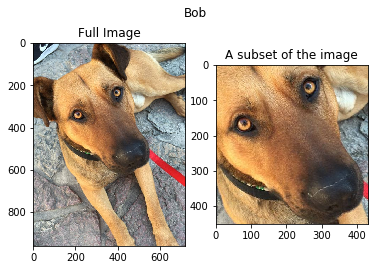

In [23]:
plt.subplot(121)
plt.imshow(full_img)
plt.title('Full Image')

plt.subplot(122)
plt.imshow(face_img)
plt.title('A subset of the image')

plt.suptitle('Bob')
plt.show()

In [27]:
height, width,channels = face_img.shape

In [28]:
# methods for comparison
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

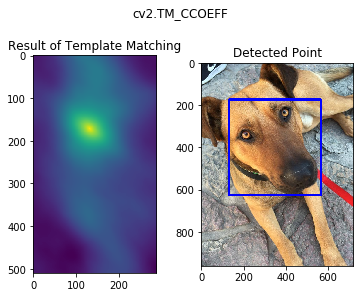

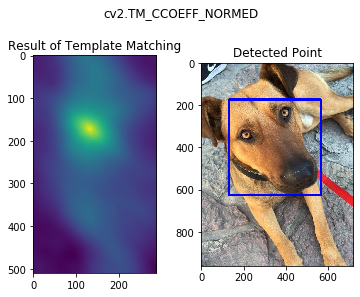

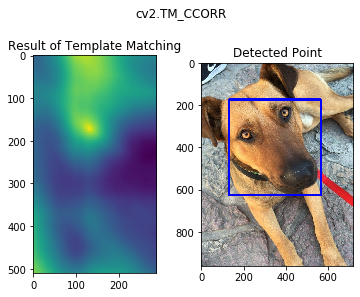

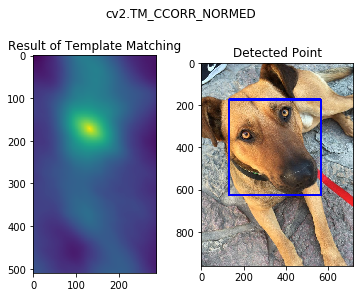

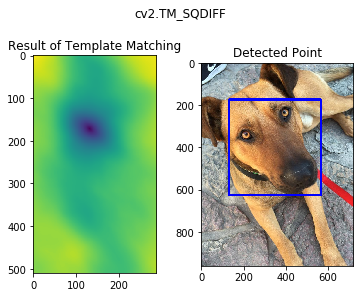

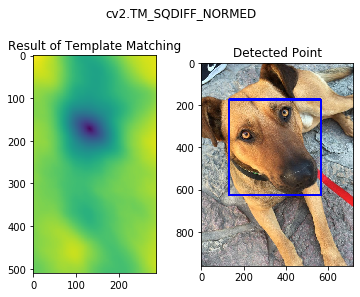

In [40]:
for m in methods:
    full_img_copy = full_img.copy()
    
    # Apply template matching
    method = eval(m)
    mt = cv2.matchTemplate(full_img_copy, face_img, method)
    
    # Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(mt)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    
    # Create rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(full_img_copy, top_left, bottom_right, (0,0,255), 10)
    
    # Plot the Images
    plt.subplot(121)
    plt.imshow(mt)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_img_copy)
    plt.title('Detected Point')
    plt.suptitle(m, y=1.05)
    
    plt.show()
    print('\n')

In [ ]:
# Assignment from Robot Dreams Course

In [229]:
supermarket = cv2.imread('supermarket.jpg')
supermarket = cv2.cvtColor(supermarket, cv2.COLOR_BGR2RGB)

logo = supermarket[710:750, 1090:1120] #vetsi cast loga prinasela mensi shodu

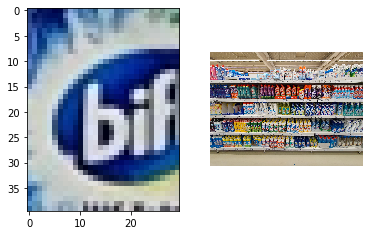

In [230]:
plt.subplot(121)
plt.imshow(logo)

plt.subplot(122)
plt.imshow(supermarket)

plt.axis("off")
plt.show()

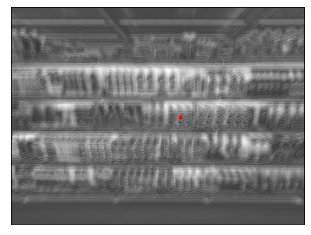

Result 1: Location (1090, 710)
Result 2: Location (1270, 711)
Result 3: Location (1137, 709)
Result 4: Location (1460, 710)
Result 5: Location (1030, 709)
Result 6: Location (1410, 711)
Result 7: Location (1209, 713)
Result 8: Location (1337, 711)
Result 9: Location (1510, 712)
Result 10: Location (1753, 720)


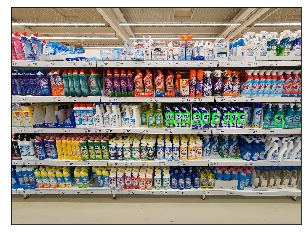

In [233]:
res = cv2.matchTemplate(supermarket, logo, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

plt.imshow(res, cmap=plt.cm.gray)
plt.scatter(*min_loc, color="red", marker=".")
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()


matched = supermarket.copy()
multi_res = res.copy()
w, h, c = logo.shape[::-1]
for i in range(10): # top 10 results
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(multi_res)
    top_left = min_loc
    bottom_right = (top_left[0] + w*15, top_left[1] + h*2)
    cv2.rectangle(matched, top_left, bottom_right, (0, 255, 0), 5)
    multi_res[
        top_left[1] - h : top_left[1] + h,
        top_left[0] - w : top_left[0] + w,
    ] = max_val
    print(f"Result {i+1}: Location {top_left}")
plt.imshow(matched, cmap=plt.cm.gray)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()


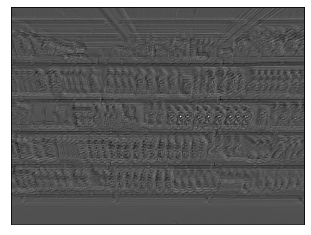

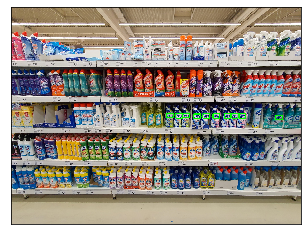

In [232]:

# korelační koeficient, v tomto případě jsou detekce v maximech.
# %%
res = cv2.matchTemplate(supermarket, logo, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# %%
plt.imshow(res, cmap=plt.cm.gray)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()
# %% [markdown]
# Pro maxima musíme otočit logiku doplňování detekcí a hledání více vzorů v
# obraze.
# %%
matched = supermarket.copy()
multi_res = res.copy()
w, h, c = logo.shape[::-1]
for i in range(10):  # jsou tam velke prekryvy
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(multi_res)
    top_left = max_loc
    bottom_right = (top_left[0] + w*15, top_left[1] + h*1)
    cv2.rectangle(matched, top_left, bottom_right, (0, 255, 0), 5)
    multi_res[
        top_left[1] - h*2 : top_left[1] + h*2,
        top_left[0] - w*2 : top_left[0] + w*2,
    ] = min_val

plt.imshow(matched, cmap=plt.cm.gray)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

## 2) Corner Detection
Corners are often considered to be areas of high interest because they provide a lot of information about the structure of the object in the image. 

<br>

A corner is a point whose local neighborhood stands in two dominant and different edge directions
* junction of two edges
* sudden change in the image brightness

#### Harris Corner Detection
* corners can be detected by looking for significant change in all directions
* shifting the small window (rectangle over the edge) in any direction would result in a large change in appearance if there is a corner
    * flat regions do not have any chance in any direction
    * edge - there is no major change along the direction of the edge

#### Shi-Tomasi Corner Detection
* just small modifications from Harris Detection algorithm, but it ended up with better results
* change in the scoring funtion selection criteria

<br>

#### Key Applications of Corner Detection:


1) Feature Matching:
* Corners are often used as keypoints for matching features between images. For example, in stereo vision, matching corners in two different images helps estimate depth.

2) Object Recognition:
* Recognizing objects in images is easier when corners are detected, as they represent distinctive points of an object.

3) Motion Tracking:
* Corners can be tracked across video frames. The motion of the corners helps to estimate the movement of the camera or objects in the scene.

4) 3D Reconstruction:
* Corners in multiple images taken from different angles can be used to reconstruct a 3D model of a scene or object.

5) Camera Calibration:
* In many calibration techniques, corners (such as those in a checkerboard pattern) are detected and used to estimate the parameters of the camera.

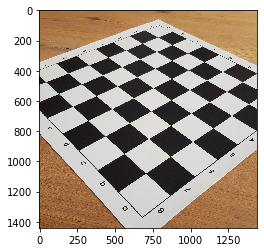

In [62]:
chess = cv2.imread('chessboard_mat.jpg')
chess = cv2.cvtColor(chess,cv2.COLOR_BGR2RGB)
plt.imshow(chess)

In [63]:
gray_chess = cv2.cvtColor(chess, cv2.COLOR_RGB2GRAY)

<br>

### Harris Corner Detection

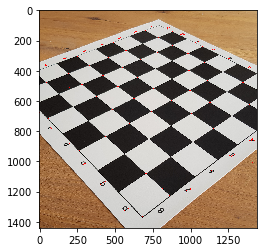

In [64]:
chess_hc = chess.copy()
# Convert Gray Scale Image to Float Values
gray_hc = np.float32(gray_chess)

# Corner Harris Detection. Image to store the Harris detector responses
# the most common values of parameters are being used
# blockSize = Neighborhood size
# ksize = Aperture parameter for the Sobel operator hat calculates X and Y gradients
# k = Harris detector free parameter
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
# if exceed the expected edge the value 1 % of the max value = CORNER -> be red
chess_hc[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(chess_hc)

<br>

### Shi-Tomasi Corner Detector

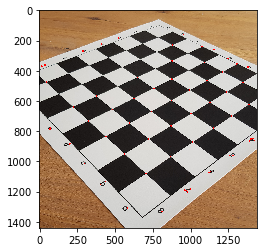

In [68]:
# maxCorners Maximum number of corners to return (-1 means no limit). Here 64
# qualityLevel = 0.01
# minDistance = 10

corners = cv2.goodFeaturesToTrack(gray_chess,64,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(chess_st,(x,y),5,255,-1)

plt.imshow(chess_st)

## 3) Edge Detection
Edge detection is a fundamental technique in computer vision used to identify the boundaries of objects within an image. It works by detecting significant changes in pixel intensity, which usually correspond to the edges of objects. These edges provide crucial structural information about the image and help in various vision-based applications.

Edge detection is used to simplify an image while preserving its essential structural features. Instead of analyzing every pixel, computer vision systems can focus on edges, making computations more efficient and improving the accuracy of object recognition and segmentation.

#### Key Applications of Edge Detection

1) Object Detection & Recognition
* Helps in identifying objects by detecting their contours.
* Used in face recognition, license plate detection, and other object recognition tasks.


2) Image Segmentation
* Separates objects from the background by detecting edges that form the boundaries of objects.
* Used in medical imaging (e.g., detecting tumors in MRI scans).


3) Feature Extraction
* Many computer vision algorithms use edges as key features for further processing.
* Used in AI-based image analysis, including autonomous vehicles and robotics.


4) Motion Detection & Tracking
* Edges help track objects in video sequences by identifying their shape and movement.
* Used in surveillance systems and gesture recognition.


5) Optical Character Recognition (OCR)
* Edge detection improves text extraction from images by detecting the contours of characters.

<br>

#### Popular Edge Detection Algorithms:

1) Sobel Operator
* Computes the gradient of an image using convolution.
* Detects edges by highlighting areas with high intensity changes.

2) Canny Edge Detection (Most widely used)
* Multi-step process including Gaussian blurring, gradient calculation, non-maximum suppression, and thresholding.
* Produces thin, accurate edges with minimal noise.

3) Prewitt and Roberts Operators
* Similar to Sobel but with different convolution kernels.

4) Laplacian of Gaussian (LoG)
* Detects edges by finding zero-crossings in the second derivative of the image.

### Canny Edge Detection
Canny is the most popular edge detection algorithms (multi-stage algorithm, in opencv combined into one-liner)

Steps:
1. Apply Gaussian filter to smooth the image in order to remove the noise (otherwise it ends up detecting way too many edges)
    a. Sometimes you will need to apply your own smoothing and blurring techniques first (default Canny might not be enough)
2. Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges
5. Track edge by hysteresis = Finalize the detection of edges by suppressing all the other edages that are weak or not connected to strong edges

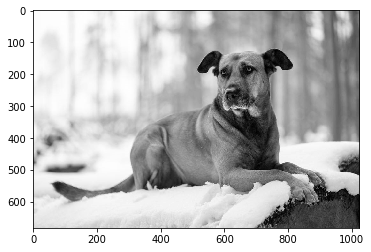

In [155]:
full_img = cv2.imread('Bobik.jpg')


full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2GRAY)
plt.imshow(full_img, cmap = 'gray')

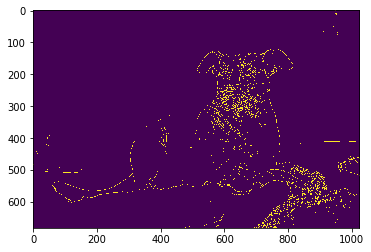

In [159]:
edges = cv2.Canny(image=full_img, threshold1=127, threshold2=127)
plt.imshow(edges)

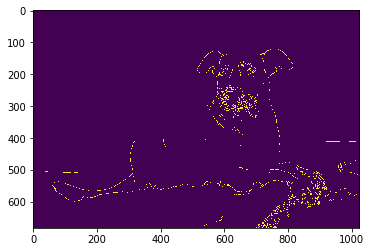

In [162]:
# Calculate the median pixel value
med_val = np.median(full_img) 

# Lower bound is either 0 or 70% of the median value, whichever is higher
lower = int(max(0, 0.7* med_val))

# Upper bound is either 255 or 30% above the median vaalue, whichever is lower
upper = int(min(255,1.3 * med_val))

edges = cv2.Canny(image=full_img, threshold1=lower , threshold2=upper)
plt.imshow(edges)

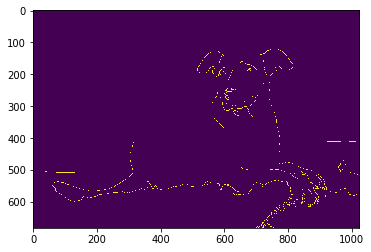

In [148]:
blurred_img = cv2.blur(full_img,ksize=(3,3))
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
plt.imshow(edges)

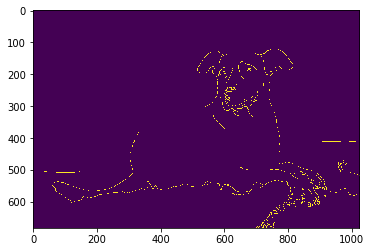

In [149]:
# sometimes you need to play around with the values
edges = cv2.Canny(image=blurred_img, threshold1=lower -50, threshold2=upper)
plt.imshow(edges)

## 4) Feature matching

#### template matching
find object within a larger image, but it required and exact copy of the image - exact subset of that image without any resizing or change of the brightness
* often that isn't useful in a real world situation

<br>

#### feature matching
extracts defining key features from an input image (using ideas from corner, edge and contour detection)
* then using a distance calculation, finds all the matches in a secondary image
* this means we are no longer required to have an exact copy of the target image
* searching for logo in the picture of the supermarker aisle
* 3 main methods:
    * Brute-Force Matching with ORB Descriptors
        * the worst of them
    * Brute-Force Matching with SIFT Descriptors and Ratio Test
        * does really well when dealing with image sizes on a different scale
    * FLANN based Matcher  = fast library for approximate nearest neighbors
        * faster, but the results are not so precise (good matches, not the best)
        * possible trade off between precision and speed based on parameters 


In [234]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [238]:
logo = cv2.imread('../DATA/reeses_puffs.png',0)     
supermarket = cv2.imread('../DATA/many_cereals.jpg',0) 

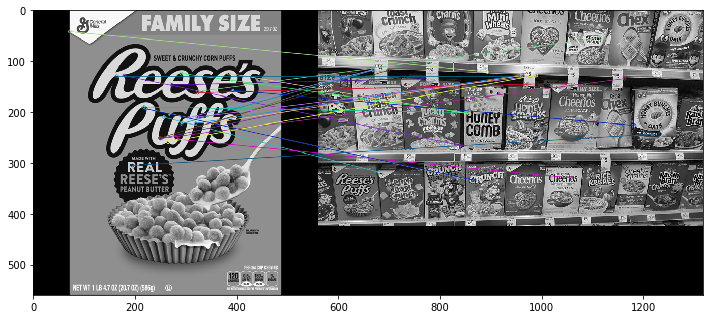

In [239]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(logo,None)
kp2, des2 = orb.detectAndCompute(supermarket,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
logo_matches = cv2.drawMatches(logo,kp1,supermarket,kp2,matches[:25],None,flags=2)
display(logo_matches)

In [240]:
# Create SIFT Object
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(logo,None)
kp2, des2 = sift.detectAndCompute(supermarket,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(logo,kp1,supermarket,kp2,good,None,flags=2)

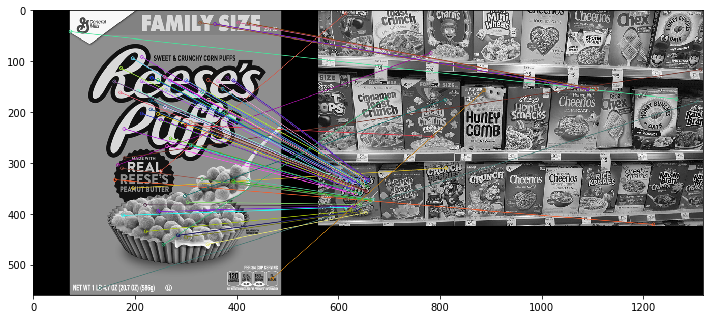

In [241]:
display(sift_matches)

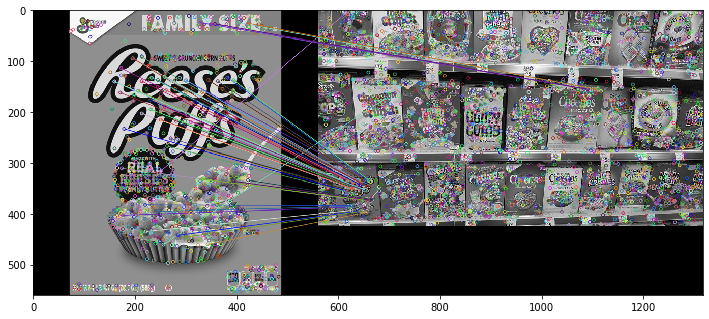

In [242]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(logo,None)
kp2, des2 = sift.detectAndCompute(supermarket,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(logo,kp1,supermarket,kp2,good,None,flags=0)

display(flann_matches)

In [243]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(logo,None)
kp2, des2 = sift.detectAndCompute(supermarket,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(logo,kp1,supermarket,kp2,matches,None,**draw_params)

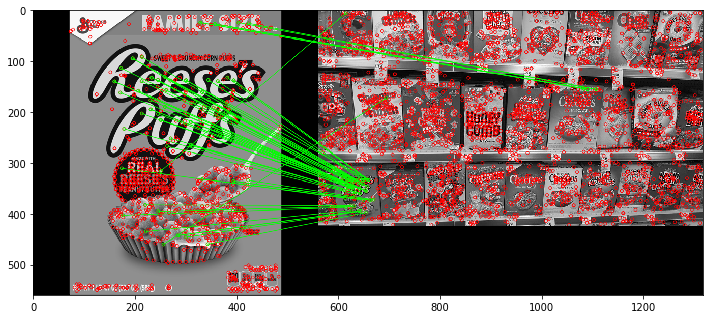

In [244]:
display(flann_matches)